In [306]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support

from sklearn import svm
from sklearn import tree

# reading data train and set

In [308]:
data_train= pd.read_csv('.\\Dataset\\NSL-KDD\\KDDTrain+.txt', header=None)
data_test= pd.read_csv('.\\Dataset\\NSL-KDD\\KDDTest+.txt',header=None)


In [309]:
data_train

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


# adding header to data train and set

In [310]:
features_names= ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','class','difficulty_level']
data_train.columns =features_names
data_test.columns = features_names

In [311]:
data_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [312]:
data_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty_level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [231]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

# deleting last column

In [313]:
del data_train["difficulty_level"]

In [314]:
del data_test["difficulty_level"]

In [315]:
data_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [316]:
data_train['class'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: class, dtype: int64

In [317]:
data_train.duplicated().sum()

0

In [318]:
cols = ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate']
def create_plot_pivot(df, x_column):
    _df_plot = df.groupby([x_column, 'class']).size() \
    .reset_index().pivot(columns='class', index=x_column, values=0)
    return _df_plot


In [319]:
n = len(data_train.select_dtypes(include=["number"]).columns)
print(n)

38


# getting binary class

In [320]:
data_train.loc[data_train['class'] != 'normal', 'class'] = 1
data_train.loc[data_train['class'] == 'normal', 'class'] = 0

data_test.loc[data_test['class'] != 'normal', 'class'] = 1
data_test.loc[data_test['class'] == 'normal', 'class'] = 0


In [321]:
data_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [322]:
data_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,0
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,1
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,1


In [242]:
'''fig, ax = plt.subplots(19, 2, figsize=(15,90))
axe = ax.ravel()

for i in range(n):
    create_plot_pivot(data_train, cols[i]).plot(kind='hist',stacked=True, ax=axe[i])
    axe[i].set_xlabel(cols[i])
    
fig.show() '''

"fig, ax = plt.subplots(19, 2, figsize=(15,90))\naxe = ax.ravel()\n\nfor i in range(n):\n    create_plot_pivot(data_train, cols[i]).plot(kind='hist',stacked=True, ax=axe[i])\n    axe[i].set_xlabel(cols[i])\n    \nfig.show() "

<AxesSubplot:xlabel='protocol_type', ylabel='count'>

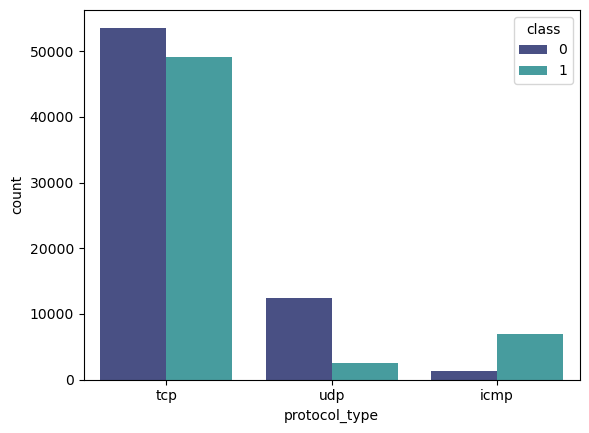

In [323]:
sns.countplot(data=data_train, x=data_train.protocol_type , hue = 'class', palette="mako")

<AxesSubplot:xlabel='count', ylabel='service'>

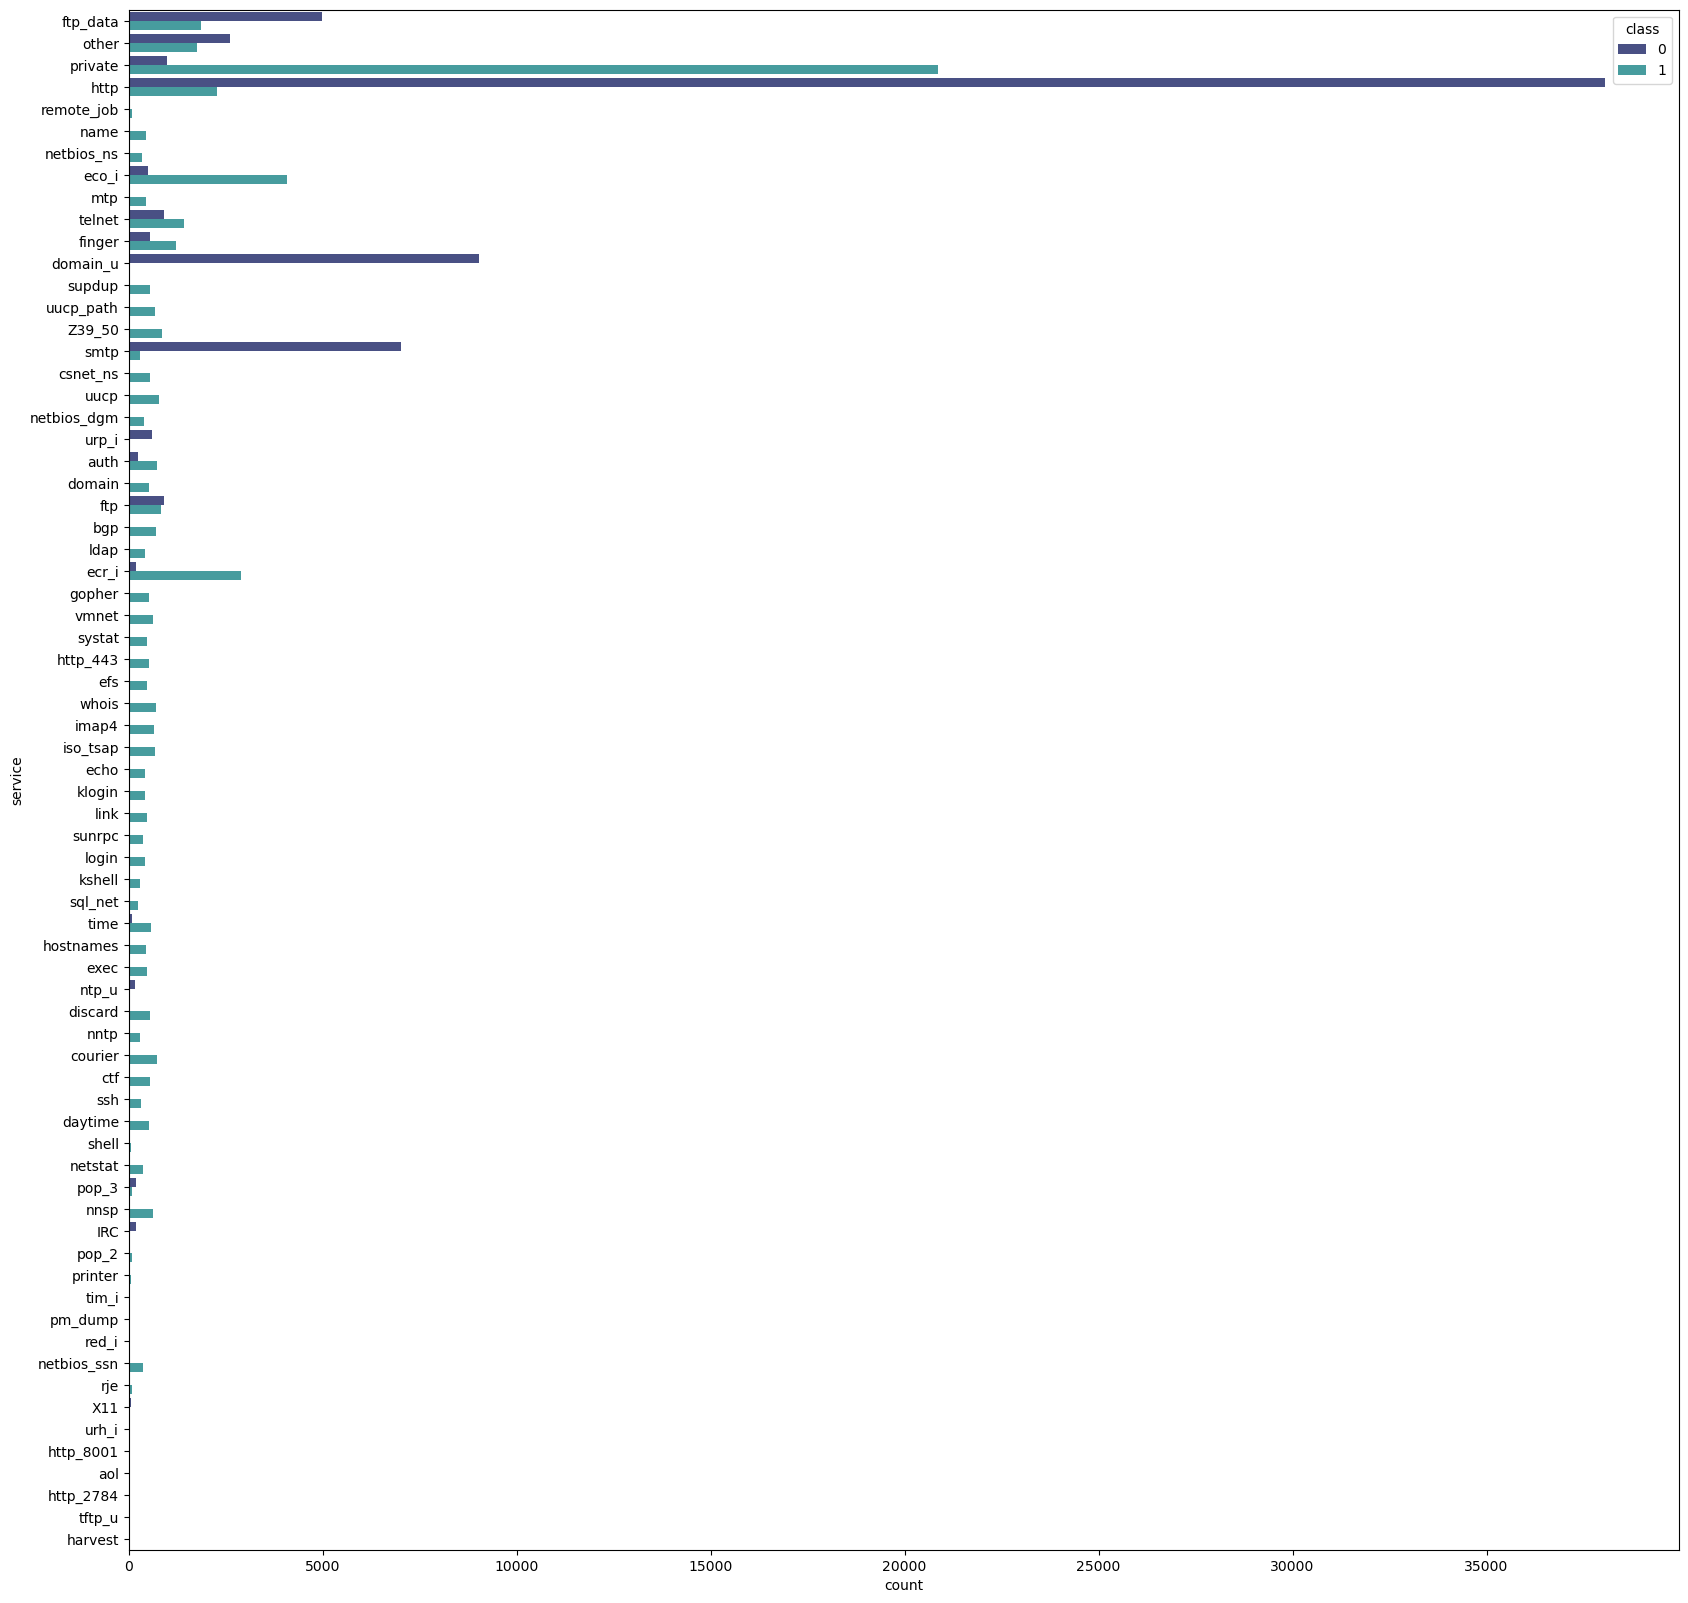

In [324]:
plt.figure(figsize = (20,20))
sns.countplot(data=data_train, y=data_train.service, hue = 'class', palette="mako")

<AxesSubplot:xlabel='flag', ylabel='count'>

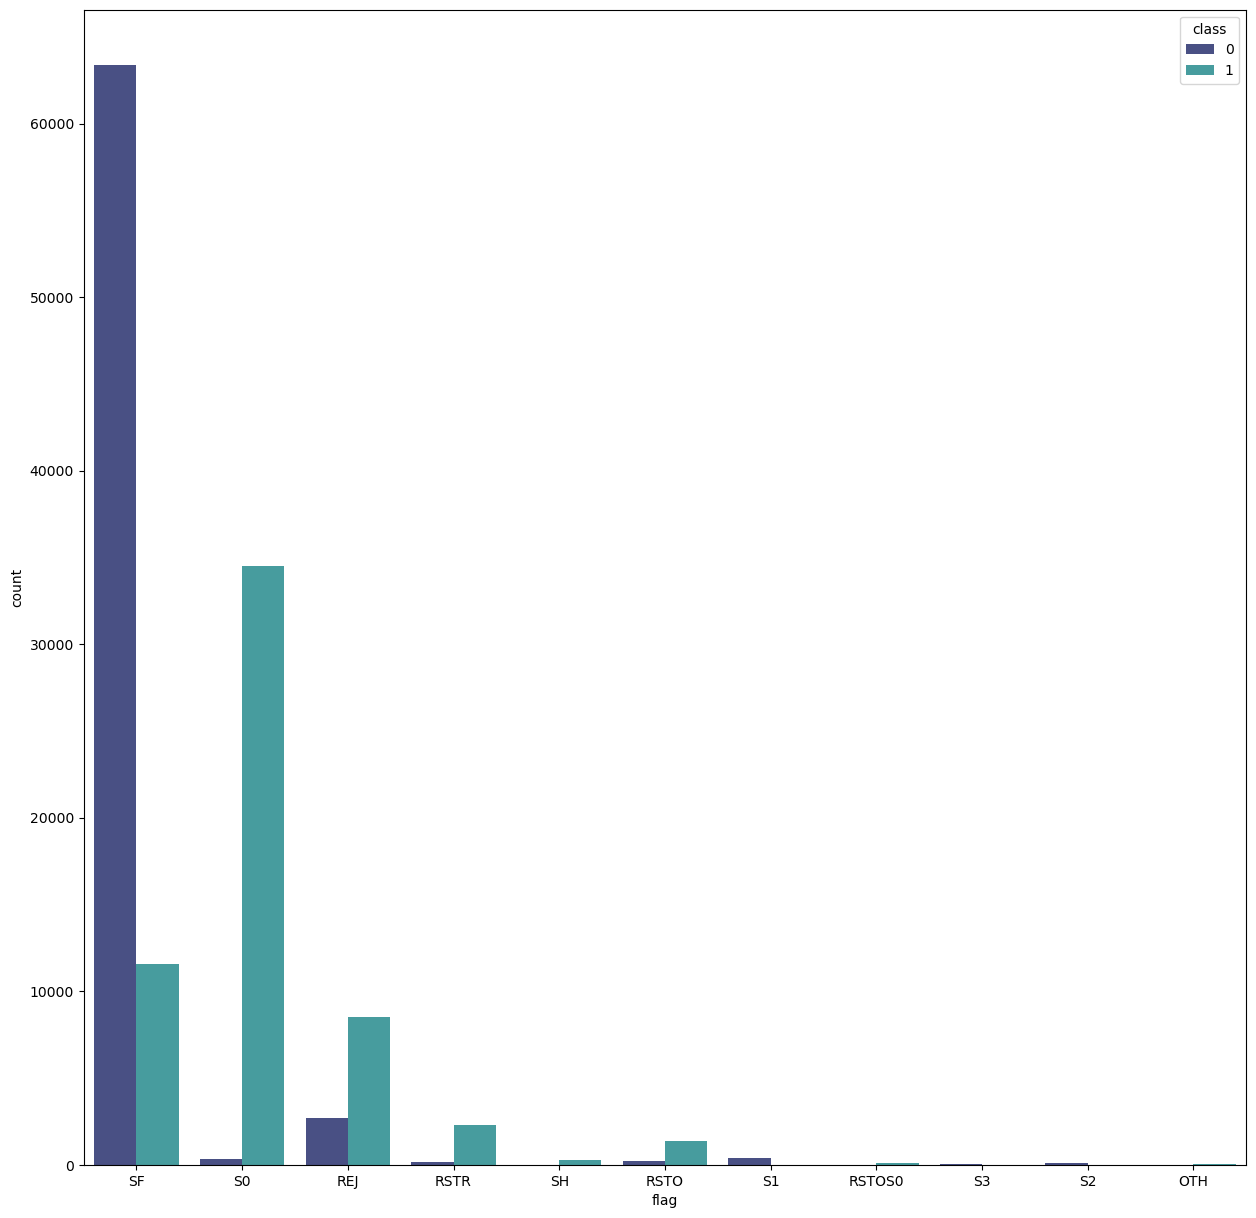

In [325]:
plt.figure(figsize = (15,15))
sns.countplot(data=data_train, x=data_train.flag, hue = 'class', palette="mako")

# show if data was balanced

In [326]:
data_train['class'].value_counts()

0    67343
1    58630
Name: class, dtype: int64

In [327]:
data_test['class'].value_counts()

1    12833
0     9711
Name: class, dtype: int64

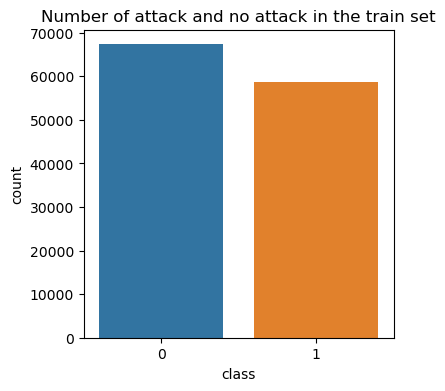

In [328]:
plt.figure(figsize=(4, 4))
sns.countplot(data=data_train, x="class")
plt.title("Number of attack and no attack in the train set")
plt.show()

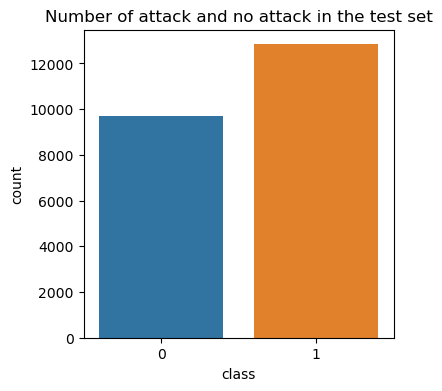

In [329]:
plt.figure(figsize=(4, 4))
sns.countplot(data=data_test, x="class")
plt.title("Number of attack and no attack in the test set")
plt.show()

# missing value  

In [330]:
data_train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [331]:
data_test.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

<AxesSubplot:>

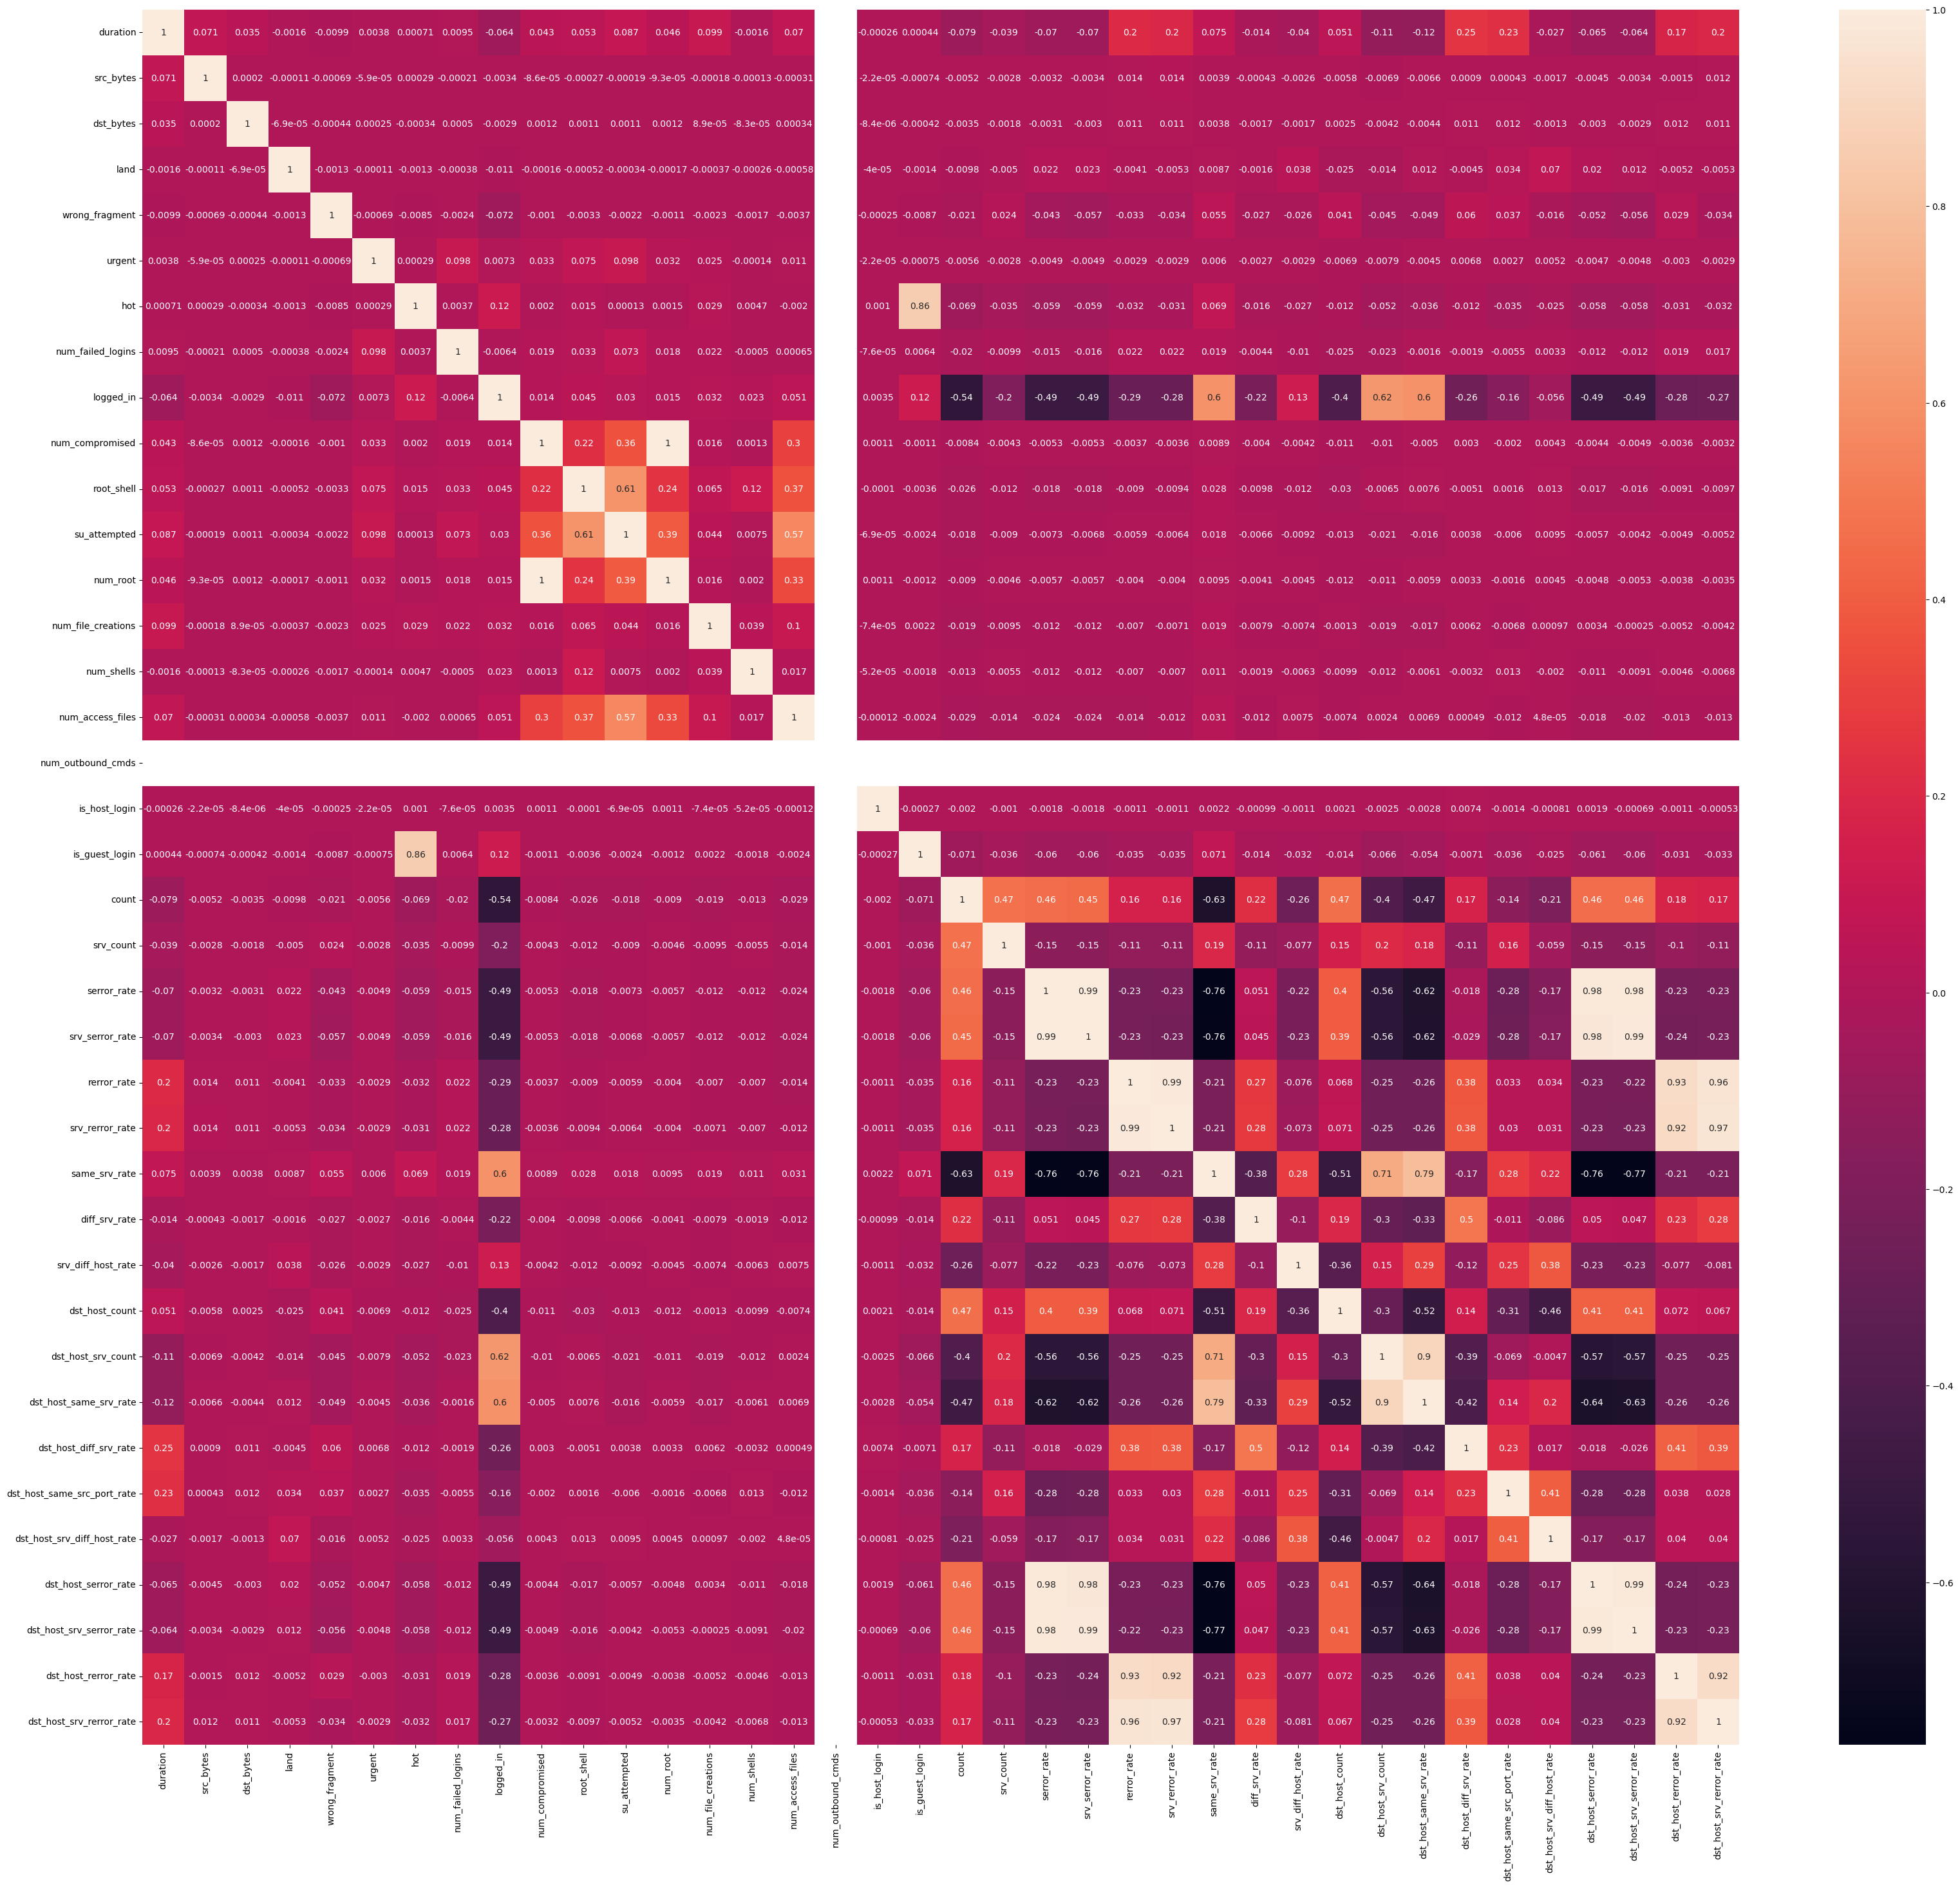

In [332]:
plt.figure(figsize=(40,35))
sns.heatmap(data_train.corr(), annot= True)

In [333]:
data_train['num_outbound_cmds'].describe()

count    125973.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: num_outbound_cmds, dtype: float64

In [334]:
data_train.drop('num_outbound_cmds',axis=1,inplace=True)
data_test.drop('num_outbound_cmds',axis=1,inplace=True)

<AxesSubplot:>

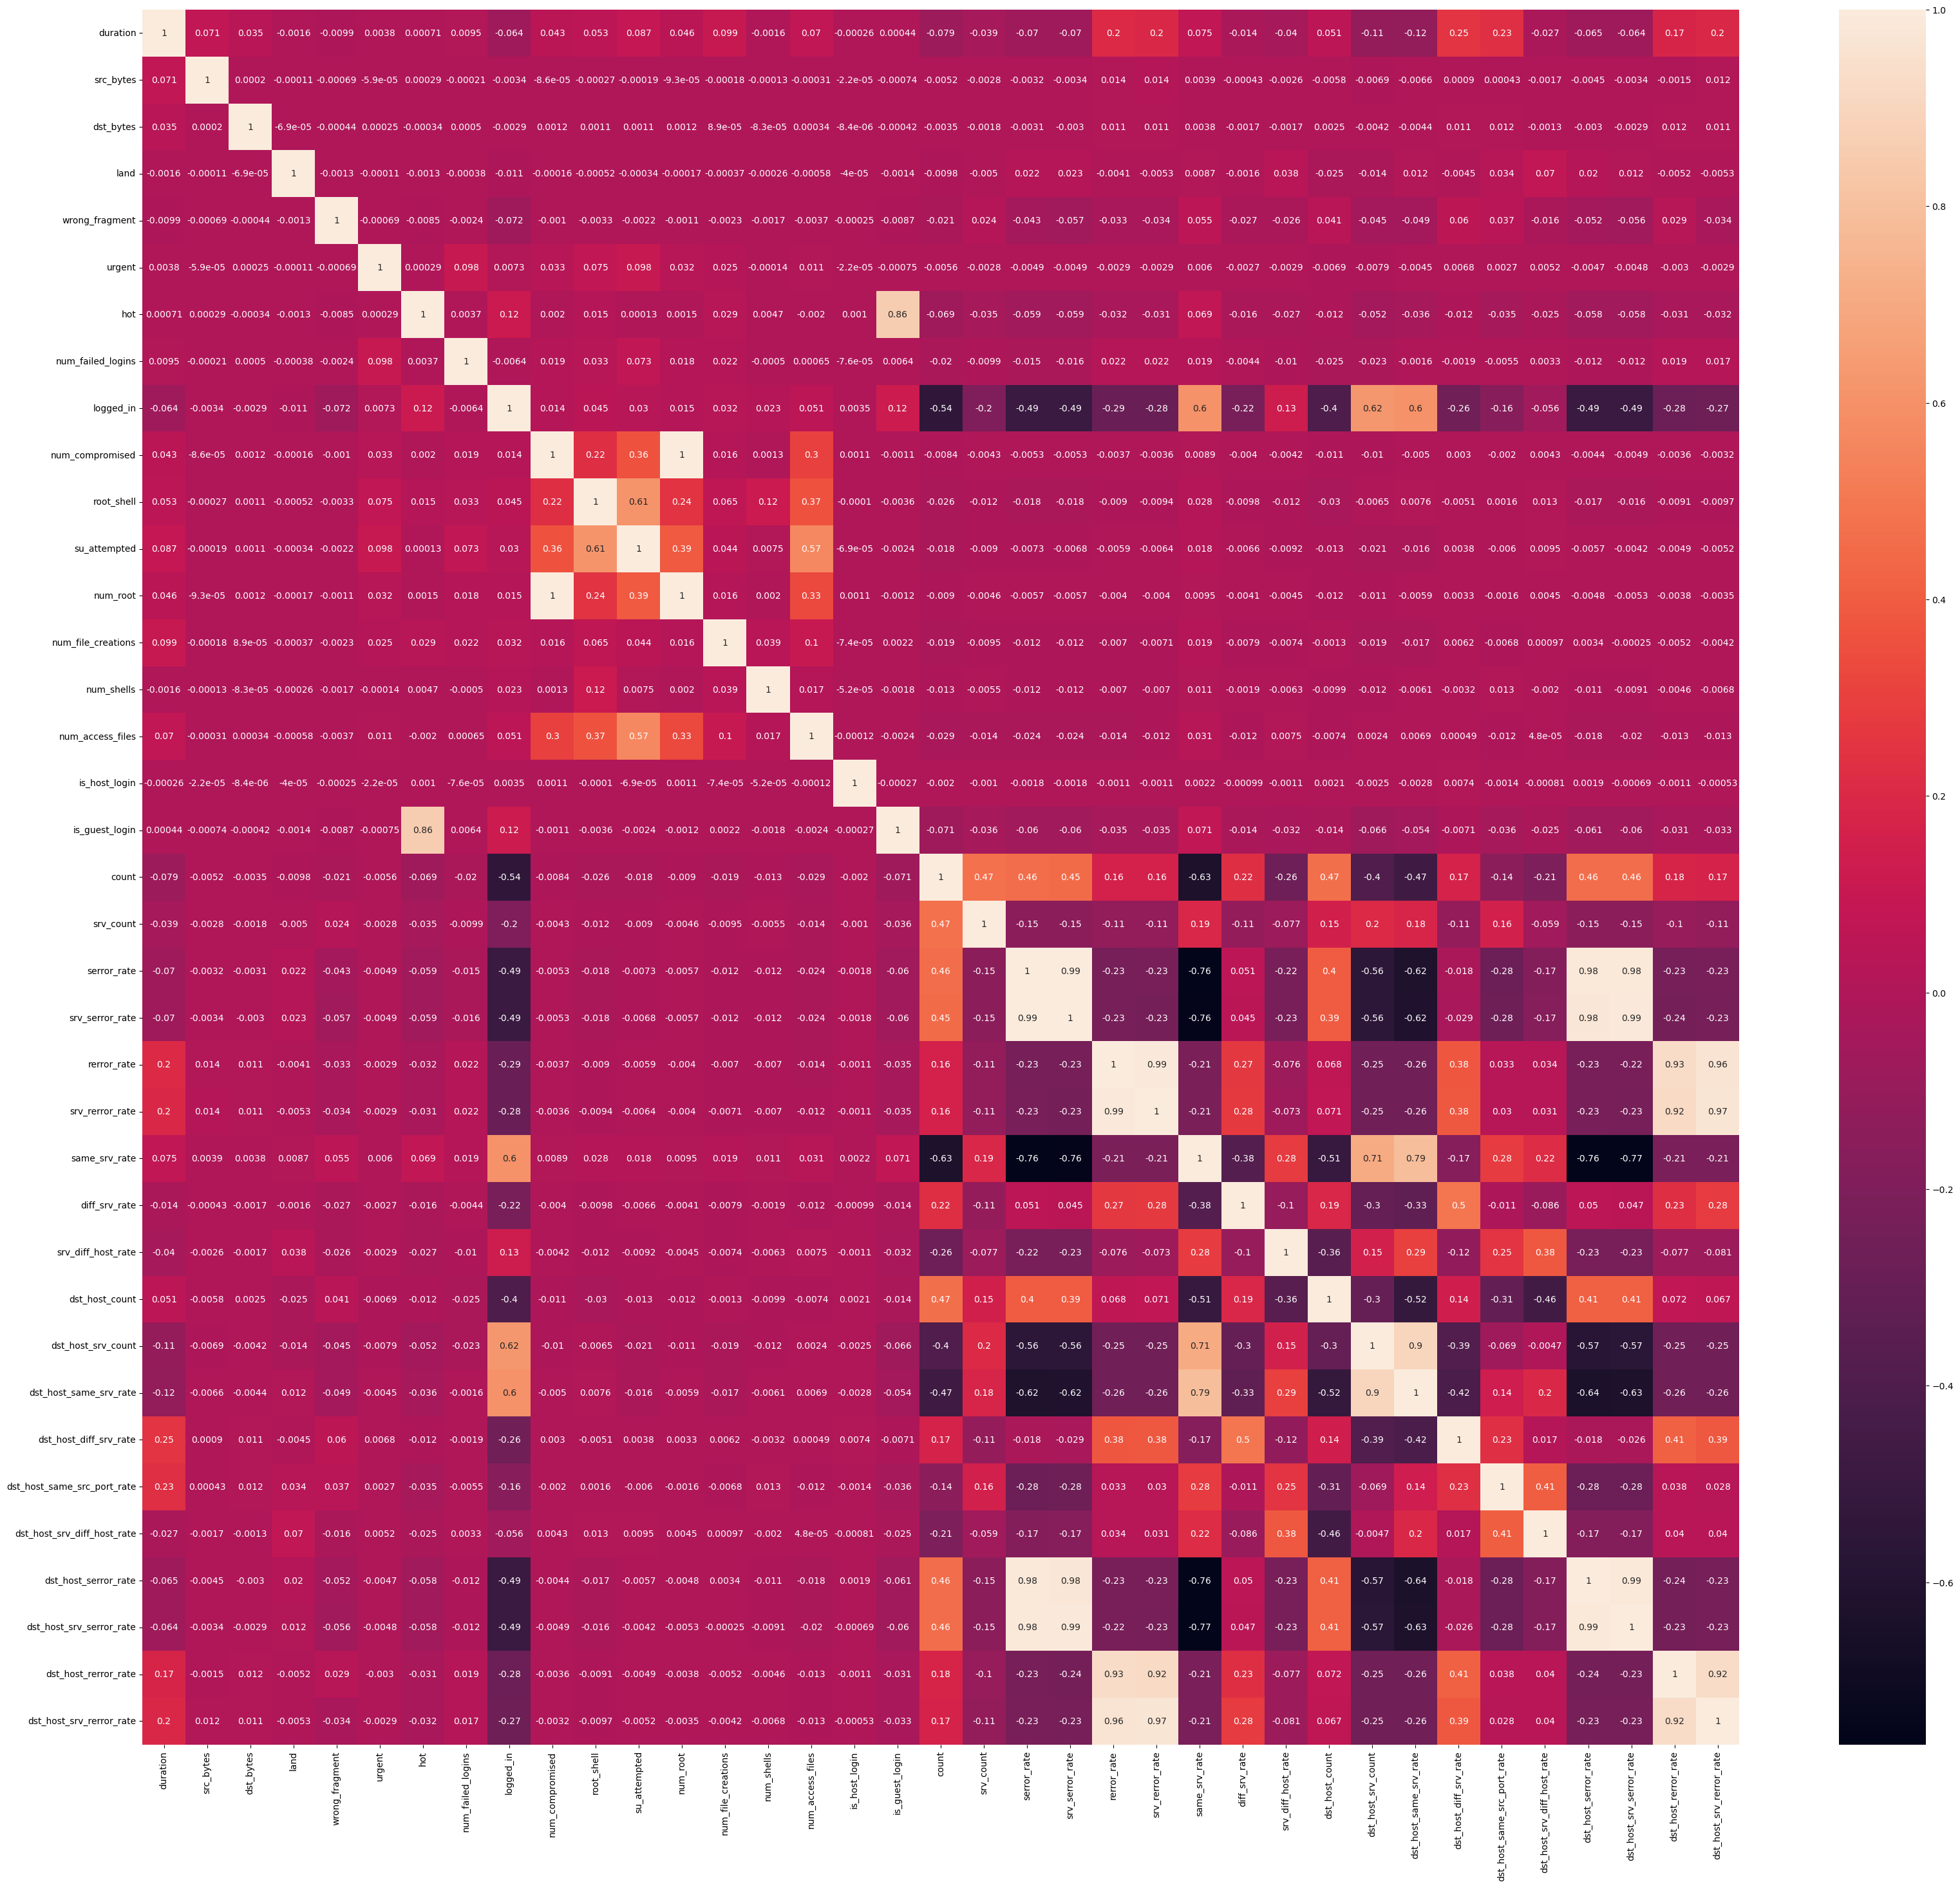

In [335]:
plt.figure(figsize=(40,35))
sns.heatmap(data_train.corr(), annot= True)

In [336]:
data_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [337]:
for col in data_train.select_dtypes('object'):
    print(f'{col :-<30} {data_train[col].unique()}')

protocol_type----------------- ['tcp' 'udp' 'icmp']
service----------------------- ['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']
flag-------------------------- ['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']
class------------------------- [0 1]


In [338]:
for col in data_test.select_dtypes('object'):
    print(f'{col :-<30} {data_test[col].unique()}')

protocol_type----------------- ['tcp' 'icmp' 'udp']
service----------------------- ['private' 'ftp_data' 'eco_i' 'telnet' 'http' 'smtp' 'ftp' 'ldap' 'pop_3'
 'courier' 'discard' 'ecr_i' 'imap4' 'domain_u' 'mtp' 'systat' 'iso_tsap'
 'other' 'csnet_ns' 'finger' 'uucp' 'whois' 'netbios_ns' 'link' 'Z39_50'
 'sunrpc' 'auth' 'netbios_dgm' 'uucp_path' 'vmnet' 'domain' 'name' 'pop_2'
 'http_443' 'urp_i' 'login' 'gopher' 'exec' 'time' 'remote_job' 'ssh'
 'kshell' 'sql_net' 'shell' 'hostnames' 'echo' 'daytime' 'pm_dump' 'IRC'
 'netstat' 'ctf' 'nntp' 'netbios_ssn' 'tim_i' 'supdup' 'bgp' 'nnsp' 'rje'
 'printer' 'efs' 'X11' 'ntp_u' 'klogin' 'tftp_u']
flag-------------------------- ['REJ' 'SF' 'RSTO' 'S0' 'RSTR' 'SH' 'S3' 'S2' 'S1' 'RSTOS0' 'OTH']
class------------------------- [1 0]


In [339]:
data_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,0
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1


In [340]:
d=data_train
data_train.describe()


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Preprocessing

# logarithmic scale

In [341]:
columns=["duration", "src_bytes","dst_bytes"]
eps = 1e-5
for column in columns:
    data_train[column] = np.log(data_train[column]+eps)
    
for column in columns:
    data_test[column] = np.log(data_test[column]+eps)

In [342]:
data_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,-10.293020,-1.306131,-3.129892,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,4.271364,8.338201,9.154677,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,-11.512925,-11.512925,-11.512925,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-11.512925,-11.512925,-11.512925,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-11.512925,3.784190,-11.512925,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-11.512925,5.620401,6.246107,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,10.666814,21.045323,20.993245,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [343]:
def encodage(df):
    code = {'tcp':0,'icmp':1,'udp':2,
     
            'ftp_data':0,'other':1,'private':2,'http':3,'remote_job':4,'name':5,'netbios_ns':6,'eco_i':7,'mtp':8,'telnet':9,
            'finger':10,'domain_u':11,'supdup':12,'uucp_path':13,'Z39_50':14,'smtp':15,'csnet_ns':16,'uucp':17,'netbios_dgm':18,
            'urp_i':19,'auth':20,'domain':21,'ftp':22,'bgp':23,'ldap':24, 'ecr_i':25,'gopher':26, 'vmnet':27,'systat':28,
            'http_443':29,'efs':30,'whois':31,'imap4':32,'iso_tsap':33,'echo':34,'klogin':35, 'link':36,'sunrpc':37,'login':38,
            'kshell':39,'sql_net':40,'time':41,'hostnames':42,'exec':43,'ntp_u':44,'discard':45,'nntp':46,'courier':47,'ctf':48,
            'ssh':49,'daytime':50,'shell':51,'netstat':52,'pop_3':53,'nnsp':54, 'IRC':55, 'pop_2':56,'printer':57,'tim_i':58 ,
            'pm_dump':59,'red_i':60,'netbios_ssn':61,'rje':62,'X11':63,'urh_i':64,'http_8001':65,'aol':66,'http_2784':67,'tftp_u':68,
            'harvest':69,
            
            'REJ':0,'SF':1,'RSTO':2,'S0':3,'RSTR':4,'SH':5,'S3':6,'S2':7,'S1':8,'RSTOS0':9,'OTH':10}
    
    for col in df.select_dtypes('object').columns:
        df.loc[:,col] = df[col].map(code)
        
    return df



In [344]:
data_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,-11.512925,tcp,ftp_data,SF,6.196444,-11.512925,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,-11.512925,udp,other,SF,4.983607,-11.512925,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,-11.512925,tcp,private,S0,-11.512925,-11.512925,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,-11.512925,tcp,http,SF,5.446737,9.006141,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,-11.512925,tcp,http,SF,5.293305,6.040255,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [345]:
data_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,-11.512925,tcp,private,REJ,-11.512925,-11.512925,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1
1,-11.512925,tcp,private,REJ,-11.512925,-11.512925,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1
2,0.693152,tcp,ftp_data,SF,9.471396,-11.512925,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,0
3,-11.512925,icmp,eco_i,SF,2.995733,-11.512925,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,1
4,0.000010,tcp,telnet,RSTO,-11.512925,2.708051,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,1


In [346]:
def normalization(df):
    scaler = MinMaxScaler()
    model=scaler.fit(df)
    df=model.transform(df)
    return df


In [347]:
def preprocessing(df):
    
    df = encodage(df)
    df = normalization(df)
    
    return df

In [348]:
data_train['class'] = data_train['class'].astype(int)
data_test['class'] = data_test['class'].astype(int)

#XTrain=data_train.drop(['class'],axis=1)
#yTrain=data_train['class']
#XTest=data_test.drop(['class'],axis=1)
#yTest=data_test['class']

XTrain = preprocessing(data_train)
XTest = preprocessing(data_test)


In [349]:
XTrain

array([[0.        , 0.        , 0.        , ..., 0.05      , 0.        ,
        0.        ],
       [0.        , 1.        , 0.01449275, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.02898551, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.        , 0.2173913 , ..., 0.01      , 0.        ,
        0.        ],
       [0.        , 0.        , 0.50724638, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [350]:
XTest.shape

(22544, 41)

In [351]:
XTrain.shape

(125973, 41)

# Outliers

<AxesSubplot:>

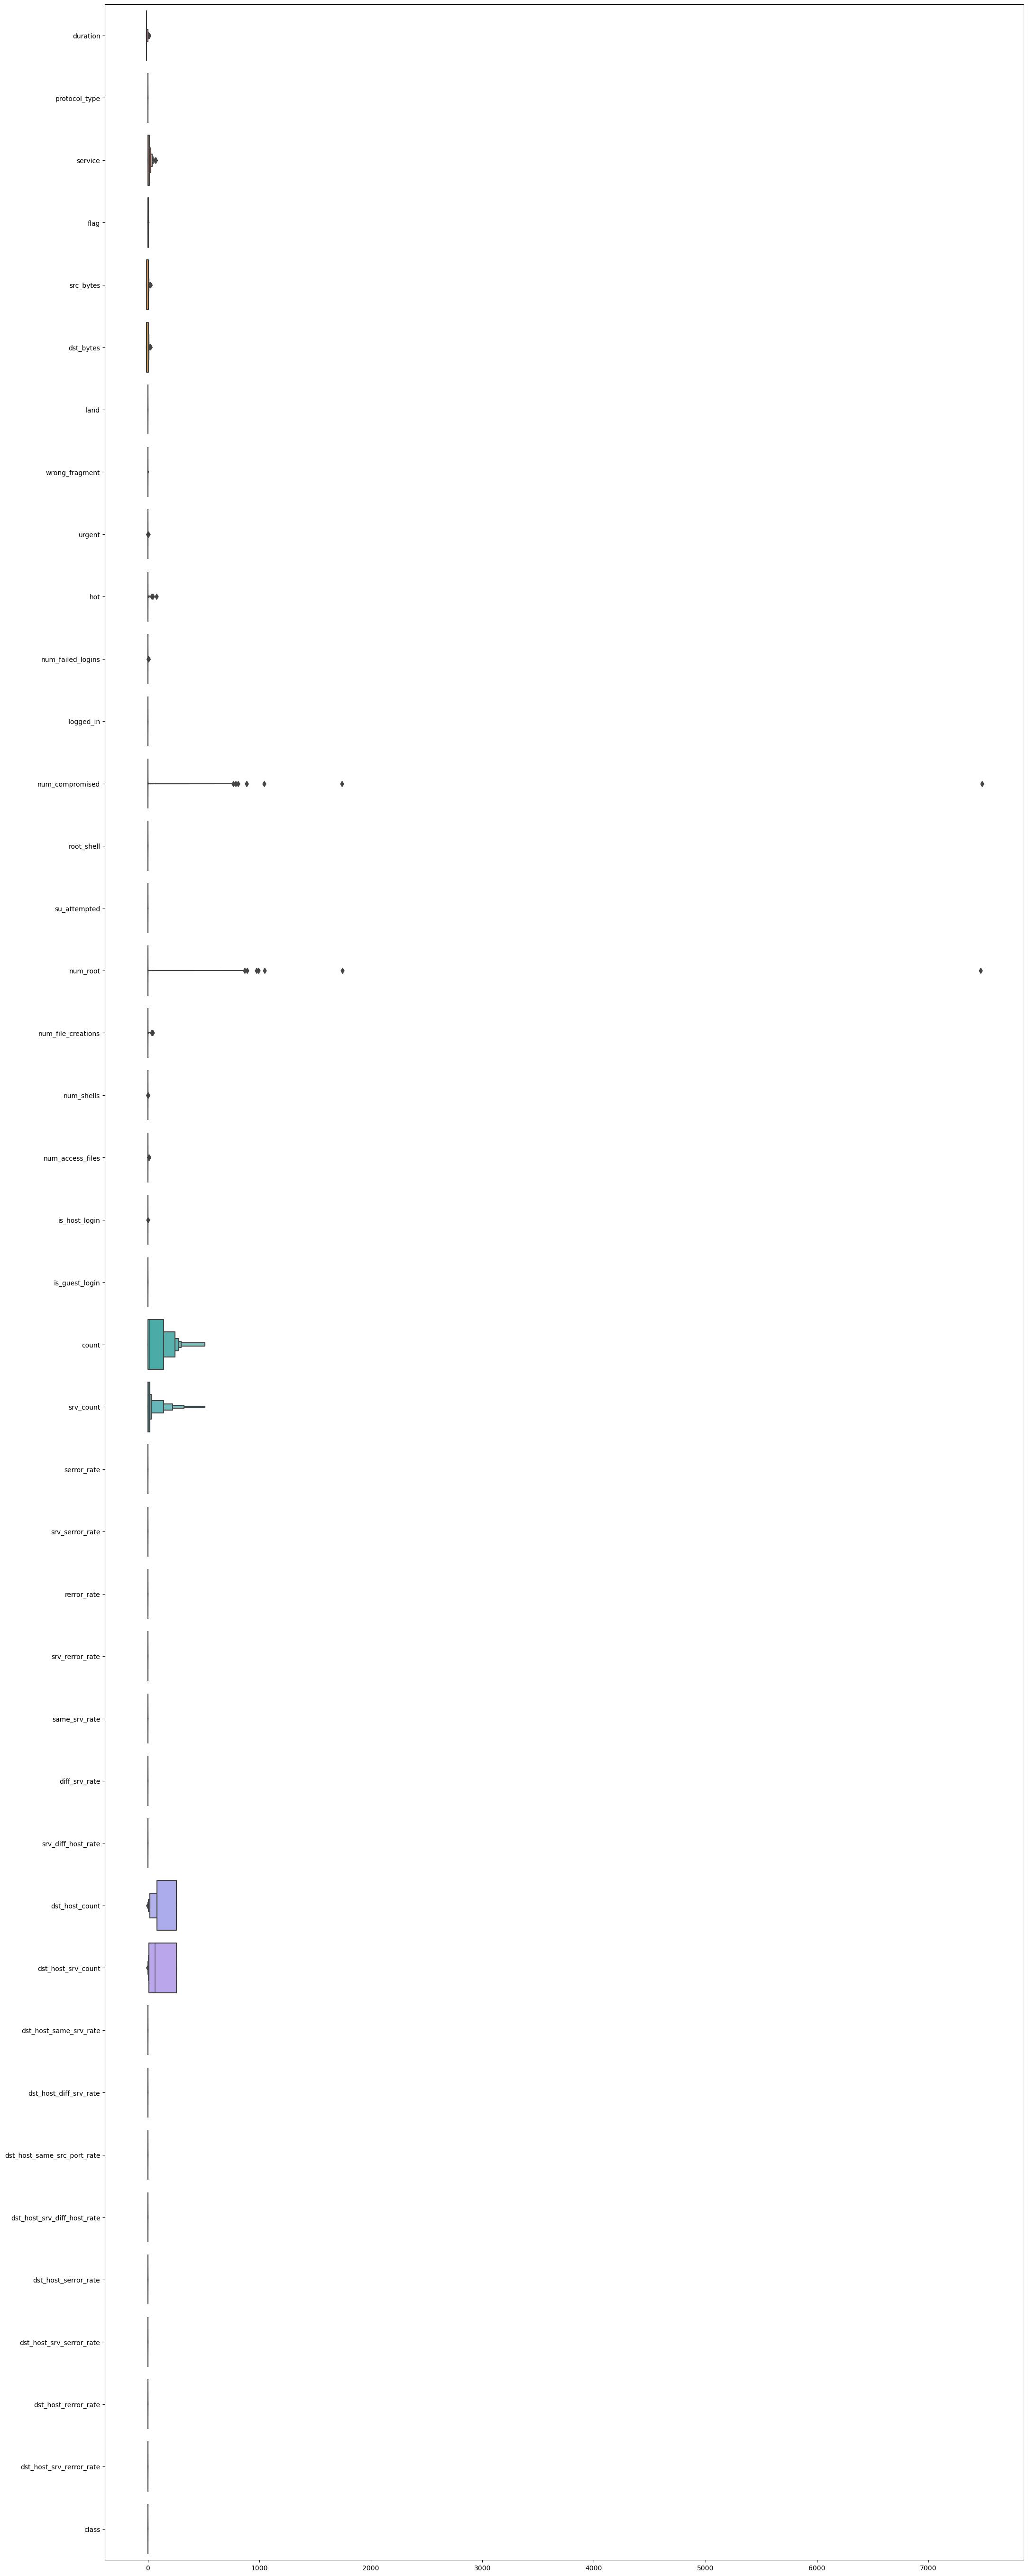

In [352]:
plt.figure(figsize=(25,70))
sns.boxenplot(data=data_train,orient="h")

# remove outliers using IQR

In [353]:
new_list= [x for x in features_names if x not in ['num_outbound_cmds', 'difficulty_level']]
dfX = pd.DataFrame(XTrain, columns=new_list)
dfT = pd.DataFrame(XTest, columns=new_list)
dfX_capping = pd.DataFrame(XTrain, columns=new_list)
dfT_capping = pd.DataFrame(XTest, columns=new_list)
data=dfX.append(dfT)
dfX.describe()

C:\Users\Mohamed\AppData\Local\Temp\ipykernel_3328\2091282811.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=dfX.append(dfT)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
count,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,0.055001,0.151925,0.146480,0.158090,0.313493,0.257891,0.000198,0.007562,0.000037,0.002655,...,0.453541,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,0.465417
std,0.192580,0.335248,0.184932,0.116105,0.256101,0.281629,0.014086,0.084510,0.004789,0.027922,...,0.434128,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,0.498805
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.028986,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.039216,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.043478,0.100000,0.469838,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.247059,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.202899,0.300000,0.526236,0.546328,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [354]:
dfX

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.000000,0.0,0.000000,0.1,0.543929,0.000000,0.0,0.0,0.0,0.0,...,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0.0
1,0.000000,1.0,0.014493,0.1,0.506678,0.000000,0.0,0.0,0.0,0.0,...,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0.0
2,0.000000,0.0,0.028986,0.3,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1.0
3,0.000000,0.0,0.043478,0.1,0.520902,0.631236,0.0,0.0,0.0,0.0,...,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0.0
4,0.000000,0.0,0.043478,0.1,0.516190,0.539995,0.0,0.0,0.0,0.0,...,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.000000,0.0,0.028986,0.3,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.098039,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1.0
125969,0.612828,1.0,0.028986,0.1,0.496553,0.507278,0.0,0.0,0.0,0.0,...,0.956863,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.0
125970,0.000000,0.0,0.217391,0.1,0.590423,0.537239,0.0,0.0,0.0,0.0,...,0.117647,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,0.0
125971,0.000000,0.0,0.507246,0.3,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.031373,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1.0


In [355]:
#dfX['val']="False"
def marquage(data,dfX):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    low = Q1 - 1.5 * IQR
    up = Q3 + 1.5 * IQR
    print(low)
    print(up)
    # create a column in the dataframe to indicate whether each value is an outlier
    dfX['outlier'] = False
    for column in dfX.columns[:-1]:
        dfX.loc[(dfX[column] < low[column]) | (dfX[column] > up[column]), 'outlier'] = True

    return(dfX)



In [356]:
marquage(data,dfX)

duration                       0.000000
protocol_type                  0.000000
service                       -0.230818
flag                          -0.200000
src_bytes                     -0.793806
dst_bytes                     -0.857740
land                           0.000000
wrong_fragment                 0.000000
urgent                         0.000000
hot                            0.000000
num_failed_logins              0.000000
logged_in                     -1.500000
num_compromised                0.000000
root_shell                     0.000000
su_attempted                   0.000000
num_root                       0.000000
num_file_creations             0.000000
num_shells                     0.000000
num_access_files               0.000000
is_host_login                  0.000000
is_guest_login                 0.000000
count                         -0.404110
srv_count                     -0.040117
serror_rate                   -1.275000
srv_serror_rate               -1.365000


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,outlier
0,0.000000,0.0,0.000000,0.1,0.543929,0.000000,0.0,0.0,0.0,0.0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0.0,True
1,0.000000,1.0,0.014493,0.1,0.506678,0.000000,0.0,0.0,0.0,0.0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0.0,True
2,0.000000,0.0,0.028986,0.3,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1.0,False
3,0.000000,0.0,0.043478,0.1,0.520902,0.631236,0.0,0.0,0.0,0.0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0.0,True
4,0.000000,0.0,0.043478,0.1,0.516190,0.539995,0.0,0.0,0.0,0.0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.000000,0.0,0.028986,0.3,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1.0,False
125969,0.612828,1.0,0.028986,0.1,0.496553,0.507278,0.0,0.0,0.0,0.0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.0,True
125970,0.000000,0.0,0.217391,0.1,0.590423,0.537239,0.0,0.0,0.0,0.0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,0.0,True
125971,0.000000,0.0,0.507246,0.3,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1.0,True


In [357]:
marquage(data,dfT)

duration                       0.000000
protocol_type                  0.000000
service                       -0.230818
flag                          -0.200000
src_bytes                     -0.793806
dst_bytes                     -0.857740
land                           0.000000
wrong_fragment                 0.000000
urgent                         0.000000
hot                            0.000000
num_failed_logins              0.000000
logged_in                     -1.500000
num_compromised                0.000000
root_shell                     0.000000
su_attempted                   0.000000
num_root                       0.000000
num_file_creations             0.000000
num_shells                     0.000000
num_access_files               0.000000
is_host_login                  0.000000
is_guest_login                 0.000000
count                         -0.404110
srv_count                     -0.040117
serror_rate                   -1.275000
srv_serror_rate               -1.365000


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,outlier
0,0.000000,0.0,0.029412,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1.0,True
1,0.000000,0.0,0.029412,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1.0,True
2,0.543067,0.0,0.000000,0.1,0.712086,0.000000,0.0,0.0,0.0,0.000000,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,0.0,True
3,0.000000,0.5,0.102941,0.1,0.492340,0.000000,0.0,0.0,0.0,0.000000,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,1.0,True
4,0.512228,0.0,0.132353,0.2,0.000000,0.554954,0.0,0.0,0.0,0.000000,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0.000000,0.0,0.220588,0.1,0.617263,0.675930,0.0,0.0,0.0,0.000000,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,0.0,False
22540,0.000000,0.0,0.044118,0.1,0.586106,0.716344,0.0,0.0,0.0,0.000000,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,0.0,True
22541,0.000000,0.0,0.044118,0.1,0.760792,0.801491,0.0,0.0,0.0,0.019802,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,1.0,True
22542,0.000000,1.0,0.161765,0.1,0.517517,0.595133,0.0,0.0,0.0,0.000000,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,0.0,True


In [358]:
dfX['outlier'].value_counts()

True     88542
False    37431
Name: outlier, dtype: int64

In [359]:
dfT['outlier'].value_counts()

True     18970
False     3574
Name: outlier, dtype: int64

In [362]:
dfX = dfX[dfX['outlier'] == False].reset_index(drop=True)
dfT = dfT[dfT['outlier'] == False].reset_index(drop=True)

In [363]:
dfX

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,outlier
0,0.0,0.0,0.028986,0.3,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.10,0.05,0.0,0.0,1.0,1.0,0.0,0.0,1.0,False
1,0.0,0.0,0.028986,0.3,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.04,0.05,0.0,0.0,1.0,1.0,0.0,0.0,1.0,False
2,0.0,0.0,0.028986,0.3,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.06,0.07,0.0,0.0,1.0,1.0,0.0,0.0,1.0,False
3,0.0,0.0,0.057971,0.3,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.09,0.05,0.0,0.0,1.0,1.0,0.0,0.0,1.0,False
4,0.0,0.0,0.028986,0.3,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.05,0.06,0.0,0.0,1.0,1.0,0.0,0.0,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37426,0.0,0.0,0.043478,0.1,0.531631,0.562924,0.0,0.0,0.0,0.0,...,1.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
37427,0.0,0.0,0.043478,0.1,0.532095,0.581141,0.0,0.0,0.0,0.0,...,1.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
37428,0.0,0.0,0.028986,0.3,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.05,0.06,0.0,0.0,1.0,1.0,0.0,0.0,1.0,False
37429,0.0,0.0,0.028986,0.3,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.05,0.07,0.0,0.0,1.0,1.0,0.0,0.0,1.0,False


In [364]:
dfT

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,outlier
0,0.0,0.0,0.044118,0.1,0.572613,0.702567,0.0,0.0,0.0,0.0,...,1.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,False
1,0.0,0.0,0.044118,0.1,0.569790,0.742274,0.0,0.0,0.0,0.0,...,1.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,False
2,0.0,0.0,0.044118,0.1,0.584235,0.686804,0.0,0.0,0.0,0.0,...,1.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,False
3,0.0,0.0,0.044118,0.1,0.584348,0.835342,0.0,0.0,0.0,0.0,...,1.00,0.00,0.05,0.02,0.05,0.0,0.0,0.0,0.0,False
4,0.0,0.0,0.044118,0.1,0.571970,0.818615,0.0,0.0,0.0,0.0,...,1.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3569,0.0,0.0,0.220588,0.1,0.623350,0.679724,0.0,0.0,0.0,0.0,...,0.02,0.01,0.00,0.00,0.00,0.0,0.0,0.0,0.0,False
3570,0.0,0.0,0.294118,0.3,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.00,0.08,0.00,0.00,1.00,1.0,0.0,0.0,1.0,False
3571,0.0,0.0,0.029412,0.3,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.05,0.07,0.00,0.00,1.00,1.0,0.0,0.0,1.0,False
3572,0.0,0.0,0.044118,0.1,0.579897,0.824098,0.0,0.0,0.0,0.0,...,1.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,False


In [365]:
'''for col in new_list: 
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR=Q3-Q1
    print(IQR)
    df2 = dfX[~((dfX[col] < (Q1 - 1.5 * IQR)) |(dfX[col] > (Q3 + 1.5 * IQR)))]
df2.describe()
'''

'for col in new_list: \n    Q1 = data[col].quantile(0.25)\n    Q3 = data[col].quantile(0.75)\n    IQR=Q3-Q1\n    print(IQR)\n    df2 = dfX[~((dfX[col] < (Q1 - 1.5 * IQR)) |(dfX[col] > (Q3 + 1.5 * IQR)))]\ndf2.describe()\n'

In [366]:
del dfX['outlier']

In [367]:
del dfT['outlier']

In [368]:
data_train=dfX

In [369]:
data_test=dfT

# IQR with capping

In [137]:
dfIQRC=dfX_capping
def capping(data,dfIQRC):
    for column in new_list: 
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR=Q3-Q1
        up=Q3 + 1.5 * IQR
        low=Q1 - 1.5 * IQR
        #dfIQRC.loc[dfIQRC[column]>up,column]=up
        #dfIQRC.loc[dfIQRC[column]<low,column]=low
       # dfIQRC = data_train[~((data_train[col] < (Q1 - 1.5 * IQR)) |(data_train[col] > (Q3 + 1.5 * IQR)))]
       # print(up,low)
        dfIQRC[column]=np.where(
            dfIQRC[column]>up,up,
            np.where(
                dfIQRC[column]<low,
                low,
                dfIQRC[column]))  

    return(dfIQRC)

In [136]:
capping(data,dfX_capping)
capping(data,dfT_capping)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,outlier
0,0.0,0.0,0.029412,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.04,0.06,0.000,0.000,0.00,0.0,0.0,0.0,1.0,True
1,0.0,0.0,0.029412,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.00,0.06,0.000,0.000,0.00,0.0,0.0,0.0,1.0,True
2,0.0,0.0,0.000000,0.1,0.712086,0.000000,0.0,0.0,0.0,0.0,...,0.61,0.04,0.125,0.020,0.00,0.0,0.0,0.0,0.0,True
3,0.0,0.0,0.102941,0.1,0.492340,0.000000,0.0,0.0,0.0,0.0,...,1.00,0.00,0.125,0.025,0.00,0.0,0.0,0.0,1.0,True
4,0.0,0.0,0.132353,0.2,0.000000,0.554954,0.0,0.0,0.0,0.0,...,0.31,0.17,0.030,0.020,0.00,0.0,0.0,0.0,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0.0,0.0,0.220588,0.1,0.617263,0.675930,0.0,0.0,0.0,0.0,...,0.72,0.06,0.010,0.010,0.01,0.0,0.0,0.0,0.0,False
22540,0.0,0.0,0.044118,0.1,0.586106,0.716344,0.0,0.0,0.0,0.0,...,1.00,0.00,0.010,0.010,0.01,0.0,0.0,0.0,0.0,True
22541,0.0,0.0,0.044118,0.1,0.760792,0.801491,0.0,0.0,0.0,0.0,...,1.00,0.00,0.000,0.000,0.00,0.0,0.0,0.0,1.0,True
22542,0.0,0.0,0.161765,0.1,0.517517,0.595133,0.0,0.0,0.0,0.0,...,0.99,0.01,0.000,0.000,0.00,0.0,0.0,0.0,0.0,True


In [138]:
data_train=dfX_capping

In [139]:
data_test=dfT_capping

In [288]:
data_train.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
count,37431.0,37431.0,37431.000000,37431.000000,37431.000000,37431.000000,37431.0,37431.0,37431.0,37431.0,...,37431.000000,37431.000000,37431.000000,37431.000000,37431.000000,37431.000000,37431.000000,37431.0,37431.0,37431.000000
mean,0.0,0.0,0.107230,0.229687,0.186157,0.199519,0.0,0.0,0.0,0.0,...,0.351110,0.365258,0.045009,0.004607,0.002212,0.651654,0.647159,0.0,0.0,0.646122
std,0.0,0.0,0.119814,0.095640,0.253440,0.275291,0.0,0.0,0.0,0.0,...,0.426441,0.432667,0.032746,0.013848,0.005699,0.474392,0.476524,0.0,0.0,0.478178
min,0.0,0.0,0.000000,0.100000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.003922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,0.0,0.0,0.028986,0.100000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.035294,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
50%,0.0,0.0,0.043478,0.300000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.070588,0.070000,0.060000,0.000000,0.000000,1.000000,1.000000,0.0,0.0,1.000000
75%,0.0,0.0,0.173913,0.300000,0.520502,0.538952,0.0,0.0,0.0,0.0,...,1.000000,1.000000,0.070000,0.000000,0.000000,1.000000,1.000000,0.0,0.0,1.000000
max,0.0,0.0,0.449275,0.600000,0.756761,0.739310,0.0,0.0,0.0,0.0,...,1.000000,1.000000,0.170000,0.120000,0.020000,1.000000,1.000000,0.0,0.0,1.000000


In [289]:
data_test.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
count,3574.0,3574.0,3574.000000,3574.000000,3574.000000,3574.000000,3574.0,3574.0,3574.0,3574.0,...,3574.000000,3574.000000,3574.000000,3574.000000,3574.000000,3574.000000,3574.000000,3574.0,3574.0,3574.000000
mean,0.0,0.0,0.061296,0.161891,0.399301,0.505655,0.0,0.0,0.0,0.0,...,0.664876,0.682994,0.024617,0.007552,0.004779,0.310050,0.309852,0.0,0.0,0.310856
std,0.0,0.0,0.070411,0.092467,0.270429,0.345308,0.0,0.0,0.0,0.0,...,0.442615,0.441402,0.035400,0.017639,0.007702,0.461261,0.462159,0.0,0.0,0.462909
min,0.0,0.0,0.000000,0.100000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.003922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,0.0,0.0,0.044118,0.100000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.062745,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
50%,0.0,0.0,0.044118,0.100000,0.574170,0.699037,0.0,0.0,0.0,0.0,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
75%,0.0,0.0,0.044118,0.300000,0.583780,0.751950,0.0,0.0,0.0,0.0,...,1.000000,1.000000,0.060000,0.010000,0.010000,1.000000,1.000000,0.0,0.0,1.000000
max,0.0,0.0,0.455882,0.300000,0.754076,0.925276,0.0,0.0,0.0,0.0,...,1.000000,1.000000,0.170000,0.120000,0.020000,1.000000,1.000000,0.0,0.0,1.000000


In [291]:
XTrain=data_train.drop(['class'],axis=1)
yTrain=data_train['class']
XTest=data_test.drop(['class'],axis=1)
yTest=data_test['class']

# Feature selection using ID3

In [292]:

clf=DecisionTreeClassifier(criterion='entropy')
selector=SelectFromModel(clf)
selector.fit(XTrain.astype(int), yTrain.astype(int))
selector.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [293]:
selector.get_feature_names_out(input_features=None)

array(['srv_serror_rate'], dtype=object)

In [294]:
XTrain.shape

(37431, 40)

In [295]:
XTrain = pd.DataFrame(XTrain) 
print(
    len([
        x for x in XTrain.columns
        if x not in XTrain.columns[selector.get_support()]
    ]))

[x for x in XTrain.columns if x not in XTrain.columns[selector.get_support()]]

39


['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [296]:
selected_feat = XTrain.columns[(selector.get_support())]
print('total features: {}'.format((XTrain.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 40
selected features: 1


In [297]:
XTrain = selector.transform(XTrain)
XTest=XTest.astype(int)
XTest=selector.transform(XTest)

In [298]:
XTrain.shape

(37431, 1)

In [299]:
XTest.shape

(3574, 1)

# feature selection with random forest




In [222]:
rf=RandomForestClassifier()
selector=SelectFromModel(rf)
selector.fit(XTrain.astype(int), yTrain.astype(int))
selector.get_support()

array([False, False, False,  True, False, False, False,  True])

In [218]:
selector.get_feature_names_out(input_features=None)

array(['x11', 'x23', 'x24', 'x27', 'x32', 'x36', 'x37', 'x40'],
      dtype=object)

In [219]:
XTrain = pd.DataFrame(XTrain) 
selected_feat = XTrain.columns[(selector.get_support())]
print('total features: {}'.format((XTrain.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 41
selected features: 8


In [220]:
XTrain = selector.transform(XTrain)
XTest=XTest.astype(int)
XTest=selector.transform(XTest)

# feature selection using correlation

In [116]:
'''data_train = pd.DataFrame(XTrain, columns=data_train.columns[:-1])

corr_matrix = data_train.corr().abs()
corr_matrix

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]
to_drop
data_train.drop(to_drop, axis=1, inplace=True) '''

'data_train = pd.DataFrame(XTrain, columns=data_train.columns[:-1])\n\ncorr_matrix = data_train.corr().abs()\ncorr_matrix\n\nupper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))\nto_drop = [column for column in upper.columns if any(upper[column] > 0.6)]\nto_drop\ndata_train.drop(to_drop, axis=1, inplace=True) '

# RFE

In [221]:
model=RandomForestClassifier()
model.fit(XTrain, yTrain.astype(int))
rfe=RFE(model,verbose=2)
fit=rfe.fit(XTrain, yTrain.astype(int))

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.


In [300]:
XTrain.shape

(37431, 1)

# split\


In [370]:
data_train.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
count,37431.0,37431.0,37431.000000,37431.000000,37431.000000,37431.000000,37431.0,37431.0,37431.0,37431.0,...,37431.000000,37431.000000,37431.000000,37431.000000,37431.000000,37431.000000,37431.000000,37431.0,37431.0,37431.000000
mean,0.0,0.0,0.107230,0.229687,0.186157,0.199519,0.0,0.0,0.0,0.0,...,0.351110,0.365258,0.045009,0.004607,0.002212,0.651654,0.647159,0.0,0.0,0.646122
std,0.0,0.0,0.119814,0.095640,0.253440,0.275291,0.0,0.0,0.0,0.0,...,0.426441,0.432667,0.032746,0.013848,0.005699,0.474392,0.476524,0.0,0.0,0.478178
min,0.0,0.0,0.000000,0.100000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.003922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,0.0,0.0,0.028986,0.100000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.035294,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
50%,0.0,0.0,0.043478,0.300000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.070588,0.070000,0.060000,0.000000,0.000000,1.000000,1.000000,0.0,0.0,1.000000
75%,0.0,0.0,0.173913,0.300000,0.520502,0.538952,0.0,0.0,0.0,0.0,...,1.000000,1.000000,0.070000,0.000000,0.000000,1.000000,1.000000,0.0,0.0,1.000000
max,0.0,0.0,0.449275,0.600000,0.756761,0.739310,0.0,0.0,0.0,0.0,...,1.000000,1.000000,0.170000,0.120000,0.020000,1.000000,1.000000,0.0,0.0,1.000000


In [375]:
XTrain=data_train.drop(['class'],axis=1)
yTrain=data_train['class']
XTest=data_test.drop(['class'],axis=1)
yTest=data_test['class']


# evaluation


In [376]:
def evaluation(XTrain,yTrain,XTest,yTest,x):
    x_score=x.score(XTest,yTest)
    y_predict=x.predict(XTest)
    y_true=yTest
    print('Accuracy : '+ str(x_score))
    precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
    print('Precision : '+(str(precision)))
    print('Recall :'+(str(recall)))
    print('F1-score : '+(str(fscore)))
    print(classification_report(y_true,y_predict))
    cm=confusion_matrix(y_true,y_predict)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    plt.show()

# decision tree

Accuracy : 0.9986010072747622
Precision : 0.9986038415387922
Recall :0.9986010072747622
F1-score : 0.9986001389851357
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2463
           1       1.00      1.00      1.00      1111

    accuracy                           1.00      3574
   macro avg       1.00      1.00      1.00      3574
weighted avg       1.00      1.00      1.00      3574



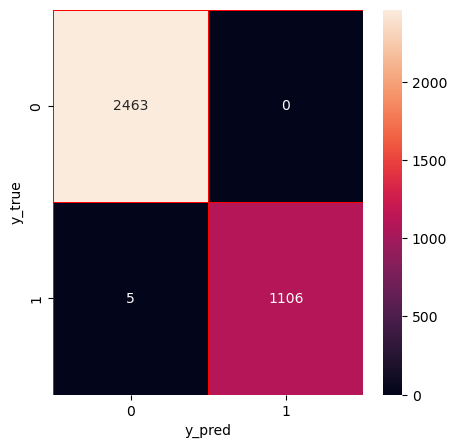

In [378]:
evalu=[]
yTest=yTest.astype(int) 
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(XTrain,yTrain.astype(int)) 
evaluation(XTrain, yTrain,XTest,yTest.astype(int),dt)


# random forest

Accuracy : 0.9986010072747622
Precision : 0.9986038415387922
Recall :0.9986010072747622
F1-score : 0.9986001389851357
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2463
           1       1.00      1.00      1.00      1111

    accuracy                           1.00      3574
   macro avg       1.00      1.00      1.00      3574
weighted avg       1.00      1.00      1.00      3574



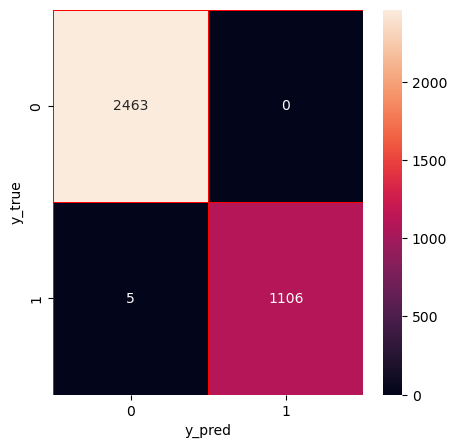

In [379]:
rf = RandomForestClassifier()
rf.fit(XTrain,yTrain.astype(int))
evaluation(XTrain, yTrain,XTest,yTest.astype(int),rf)


# knn

# best k for KNN 

In [506]:
'''
error_rate = []
for i in range(1,10):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(XTrain,yTrain.astype(int))
 pred_i = knn.predict(XTest)
 error_rate.append(np.mean(pred_i != yTest))

plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=7)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))) '''

'\nerror_rate = []\nfor i in range(1,10):\n knn = KNeighborsClassifier(n_neighbors=i)\n knn.fit(XTrain,yTrain.astype(int))\n pred_i = knn.predict(XTest)\n error_rate.append(np.mean(pred_i != yTest))\n\nplt.figure(figsize=(10,6))\nplt.plot(range(1,10),error_rate,color=\'blue\', linestyle=\'dashed\', \n         marker=\'o\',markerfacecolor=\'red\', markersize=7)\nplt.title(\'Error Rate vs. K Value\')\nplt.xlabel(\'K\')\nplt.ylabel(\'Error Rate\')\nprint("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))) '

C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy : 0.9986010072747622
Precision : 0.9986038415387922
Recall :0.9986010072747622
F1-score : 0.9986001389851357
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2463
           1       1.00      1.00      1.00      1111

    accuracy                           1.00      3574
   macro avg       1.00      1.00      1.00      3574
weighted avg       1.00      1.00      1.00      3574



C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


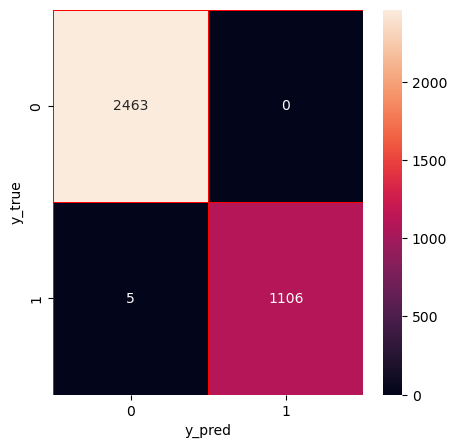

In [380]:

knn = KNeighborsClassifier(n_neighbors=2,metric='euclidean')
knn.fit(XTrain,yTrain.astype(int))
evaluation(XTrain, yTrain,XTest,yTest.astype(int),knn)


# xgb

Accuracy : 0.9986010072747622
Precision : 0.9986038415387922
Recall :0.9986010072747622
F1-score : 0.9986001389851357
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2463
           1       1.00      1.00      1.00      1111

    accuracy                           1.00      3574
   macro avg       1.00      1.00      1.00      3574
weighted avg       1.00      1.00      1.00      3574



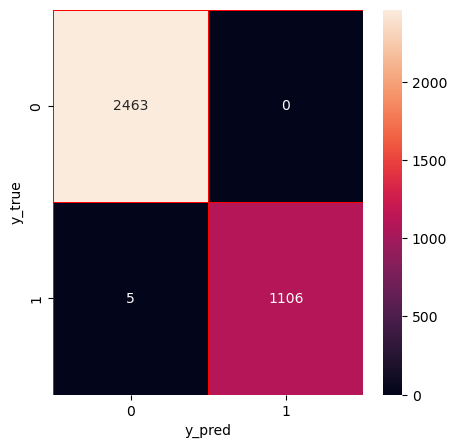

In [381]:
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(XTrain,yTrain.astype(int))
evaluation(XTrain, yTrain,XTest,yTest.astype(int),xg)


# logistic regression

Accuracy : 0.9986010072747622
Precision : 0.9986038415387922
Recall :0.9986010072747622
F1-score : 0.9986001389851357
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2463
           1       1.00      1.00      1.00      1111

    accuracy                           1.00      3574
   macro avg       1.00      1.00      1.00      3574
weighted avg       1.00      1.00      1.00      3574



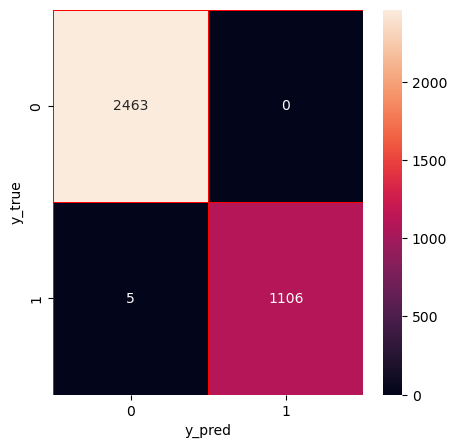

In [382]:
lr = LogisticRegression()
lr.fit(XTrain,yTrain.astype(int)) 
evaluation(XTrain, yTrain,XTest,yTest.astype(int),lr)


# svm

Accuracy : 0.9986010072747622
Precision : 0.9986038415387922
Recall :0.9986010072747622
F1-score : 0.9986001389851357
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2463
           1       1.00      1.00      1.00      1111

    accuracy                           1.00      3574
   macro avg       1.00      1.00      1.00      3574
weighted avg       1.00      1.00      1.00      3574



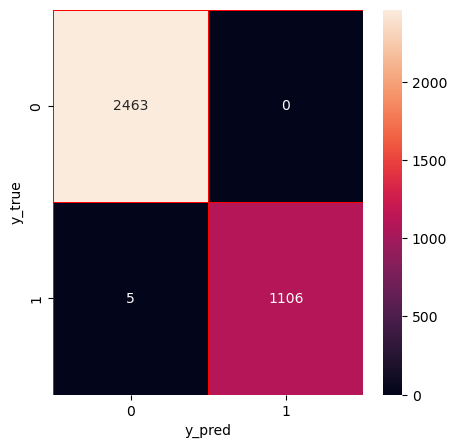

In [383]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(XTrain,yTrain.astype(int))
evaluation(XTrain, yTrain,XTest,yTest.astype(int),svm)


# NB

Accuracy : 0.9977616116396195
Precision : 0.9977688585464924
Recall :0.9977616116396195
F1-score : 0.9977593822417975
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2463
           1       1.00      0.99      1.00      1111

    accuracy                           1.00      3574
   macro avg       1.00      1.00      1.00      3574
weighted avg       1.00      1.00      1.00      3574



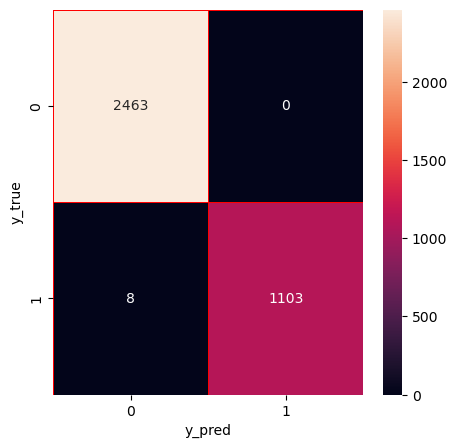

In [384]:
nb = GaussianNB()
nb.fit(XTrain,yTrain.astype(int))
evaluation(XTrain, yTrain,XTest,yTest.astype(int),nb)


# comparaison between algorithme
